In [1]:
# pipenv install scikit-learn scipy pandas matplotlib gradio seaborn ipykernel     
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns                               

In [3]:
df_colesterol = pd.read_csv('.\datasets\colesterol.csv')

In [4]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [ ]:
# Removendo coluna id que nao sera necessaria para a analise
df_colesterol.drop(columns=["Id"], inplace=True, axis=1)

In [7]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Grupo Sanguíneo     996 non-null    object 
 1   Fumante             997 non-null    object 
 2   Nível de Atividade  996 non-null    object 
 3   Idade               997 non-null    float64
 4   Peso                997 non-null    float64
 5   Altura              997 non-null    float64
 6   Colesterol          1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [ ]:
# Renomeando as colunas
df_colesterol.columns = ['grupo_sanguineo', 'fumante', 'nivel_de_atividade', 'idade', 'peso', 'altura', 'nivel_de_colesterol']

In [10]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   grupo_sanguineo      996 non-null    object 
 1   fumante              997 non-null    object 
 2   nivel_de_atividade   996 non-null    object 
 3   idade                997 non-null    float64
 4   peso                 997 non-null    float64
 5   altura               997 non-null    float64
 6   nivel_de_colesterol  1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [11]:
# Copiar DF para DF EDA
df_colesterol_eda = df_colesterol.copy()

In [12]:
# Copiar DF para DF bucketing
df_colesterol_bucketing = df_colesterol.copy()

# EDA

In [14]:
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_de_atividade,idade,peso,altura,nivel_de_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [ ]:
# Quantidade de valores nulos
df_colesterol_eda.isna().sum()

grupo_sanguineo        4
fumante                3
nivel_de_atividade     4
idade                  3
peso                   3
altura                 3
nivel_de_colesterol    0
dtype: int64

In [ ]:
# Medidas estatisticas
df_colesterol_eda.describe()

,idade,peso,altura,nivel_de_colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [18]:
# Coletar medidas das variaveis categoricas
moda_grupo_sanguineo = df_colesterol_eda.grupo_sanguineo.mode()
moda_fumante = df_colesterol_eda.fumante.mode()
moda_atividade = df_colesterol_eda.nivel_de_atividade.mode()


In [20]:
# Coletar medidas das variaveis numericas
mediana_idade = df_colesterol_eda.idade.median()
mediana_peso = df_colesterol_eda.peso.median()
mediana_altura = df_colesterol_eda.altura.median()

In [24]:
# Imputar valores ausentes (nulos)
df_colesterol_eda.fillna(value={'grupo_sanguineo': moda_grupo_sanguineo[0], 
                                'fumante': moda_fumante[0], 
                                'nivel_de_atividade': moda_atividade[0], 
                                'idade': mediana_idade, 
                                'peso': mediana_peso, 
                                'altura': mediana_altura},
                        inplace=True)

In [25]:
df_colesterol_eda.isna().sum()

grupo_sanguineo        0
fumante                0
nivel_de_atividade     0
idade                  0
peso                   0
altura                 0
nivel_de_colesterol    0
dtype: int64

In [26]:
# Convertendo float para int (idade e altura)
df_colesterol_eda.idade = df_colesterol_eda.idade.astype(int)
df_colesterol_eda.altura = df_colesterol_eda.altura.astype(int)


In [27]:
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   grupo_sanguineo      1000 non-null   object 
 1   fumante              1000 non-null   object 
 2   nivel_de_atividade   1000 non-null   object 
 3   idade                1000 non-null   int64  
 4   peso                 1000 non-null   float64
 5   altura               1000 non-null   int64  
 6   nivel_de_colesterol  1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


<Axes: xlabel='idade'>

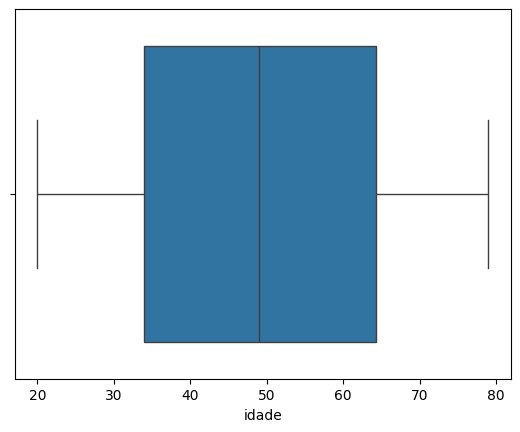

In [29]:
# Verificar outliers
sns.boxplot(data=df_colesterol_eda, x='idade')

<Axes: xlabel='peso'>

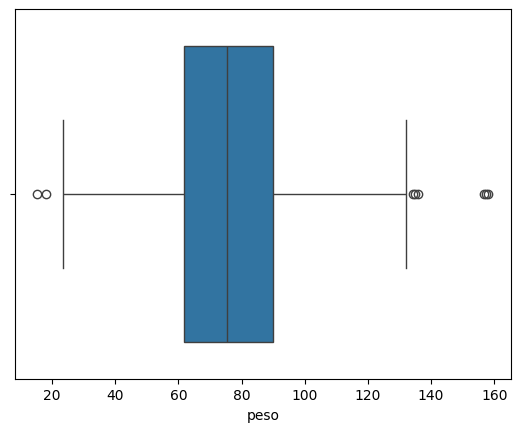

In [31]:
sns.boxplot(data=df_colesterol_eda, x='peso')

In [ ]:
# Ao analisar os outliers da variavel peso, verificamos que pesos a baixo de 40kg podem ser considerados erros de input
# Uma vez que as idades comecam a partir de 20 anos e pessoas com menos de 40 kg sao geralmente criancas, logo podemos remove-las
# Filtrar publico
df_colesterol_eda[df_colesterol_eda.peso < 40]

,grupo_sanguineo,fumante,nivel_de_atividade,idade,peso,altura,nivel_de_colesterol
9,B,Sim,Alto,44,32.7,165,97.79
26,AB,Não,Alto,47,24.8,168,72.62
71,AB,Não,Alto,63,35.2,178,91.63
73,A,Não,Baixo,50,36.5,167,109.60
74,O,Sim,Moderado,43,34.5,161,111.93
79,O,Não,Moderado,45,38.1,161,120.96
87,O,Não,Alto,38,37.5,188,84.80
143,O,Não,Moderado,58,38.0,173,107.50
175,A,Não,Alto,28,37.2,166,108.82
267,A,Não,Moderado,72,36.8,165,112.05


In [36]:
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda.peso < 40].index, axis=0, inplace=True)

<Axes: xlabel='peso'>

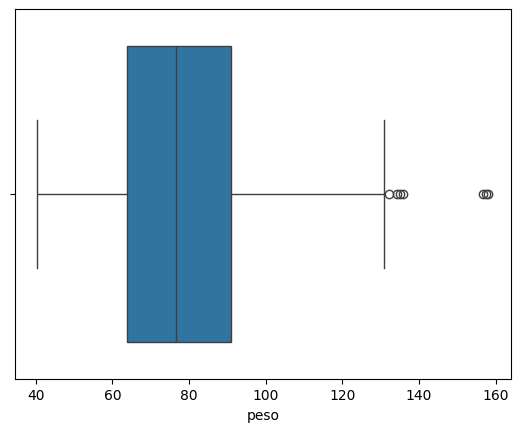

In [37]:
sns.boxplot(data=df_colesterol_eda, x='peso')

<Axes: xlabel='altura'>

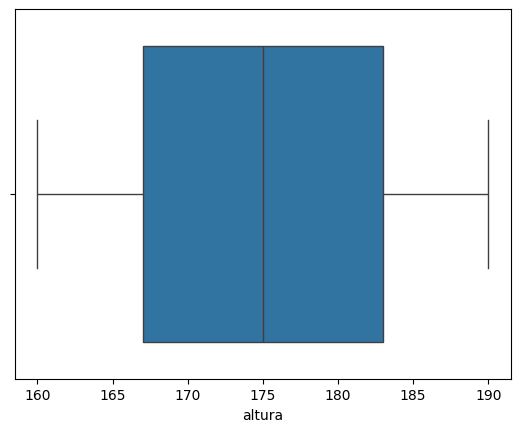

In [38]:
sns.boxplot(data=df_colesterol_eda, x='altura')

<Axes: xlabel='nivel_de_colesterol'>

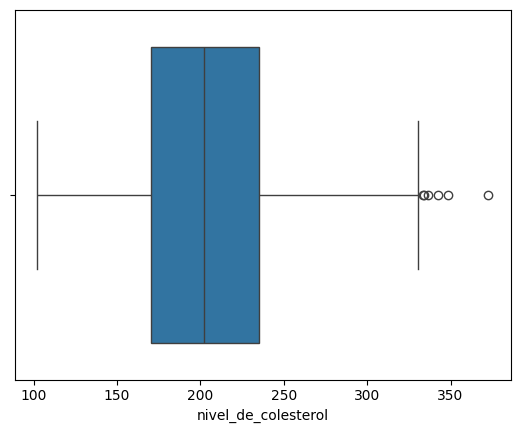

In [40]:
sns.boxplot(data=df_colesterol_eda, x='nivel_de_colesterol')

<Axes: xlabel='grupo_sanguineo', ylabel='nivel_de_colesterol'>

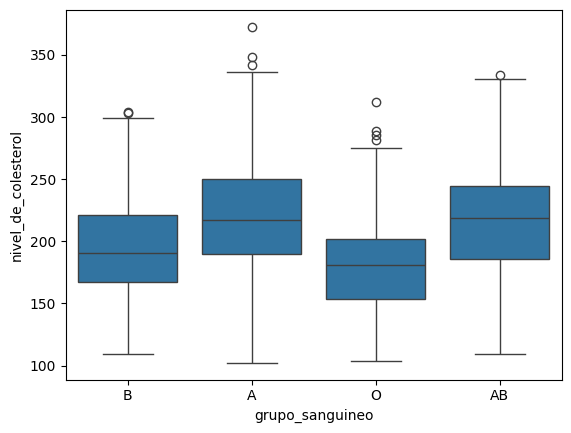

In [41]:
# Cruzamento de variaveis categoricas com nivel de colesterol
sns.boxplot(data=df_colesterol_eda, x='grupo_sanguineo', y='nivel_de_colesterol')

<Axes: xlabel='fumante', ylabel='nivel_de_colesterol'>

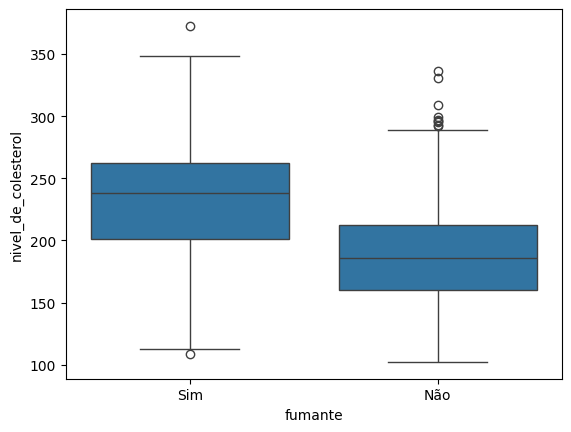

In [42]:
sns.boxplot(data=df_colesterol_eda, x='fumante', y='nivel_de_colesterol')

<Axes: xlabel='nivel_de_atividade', ylabel='nivel_de_colesterol'>

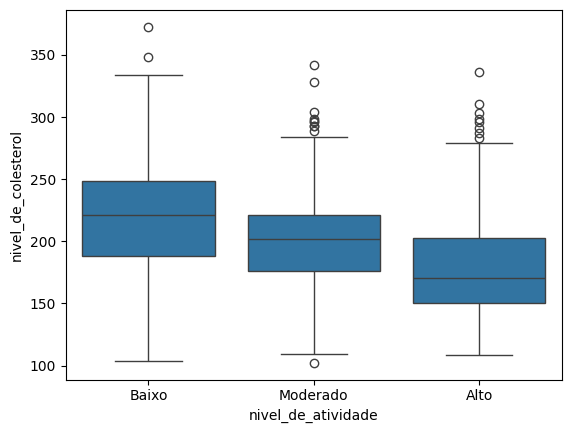

In [43]:
sns.boxplot(data=df_colesterol_eda, x='nivel_de_atividade', y='nivel_de_colesterol')

<Axes: xlabel='idade', ylabel='nivel_de_colesterol'>

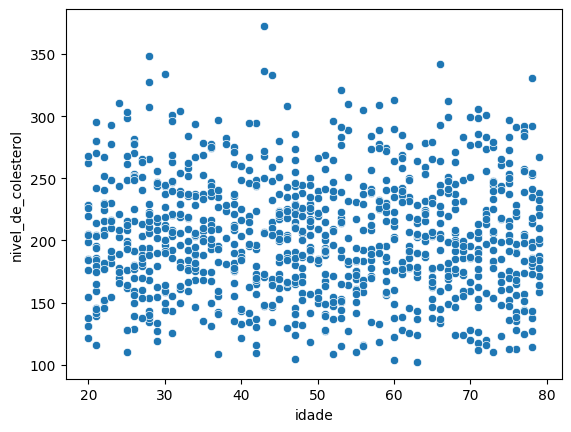

In [44]:
# Cruzamento de variaveis numericas com nivel de colesterol
sns.scatterplot(data=df_colesterol_eda, x='idade', y='nivel_de_colesterol')

<Axes: xlabel='peso', ylabel='nivel_de_colesterol'>

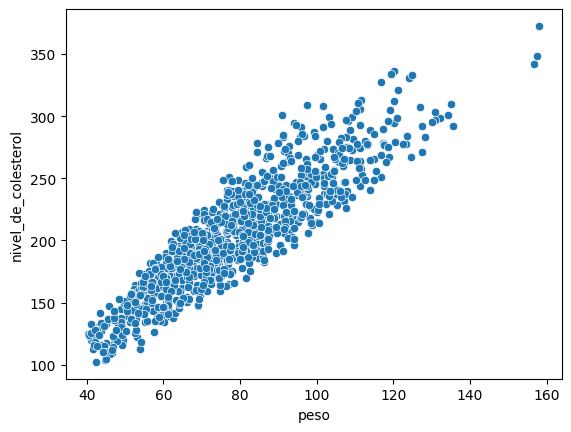

In [45]:
sns.scatterplot(data=df_colesterol_eda, x='peso', y='nivel_de_colesterol')

<Axes: xlabel='altura', ylabel='nivel_de_colesterol'>

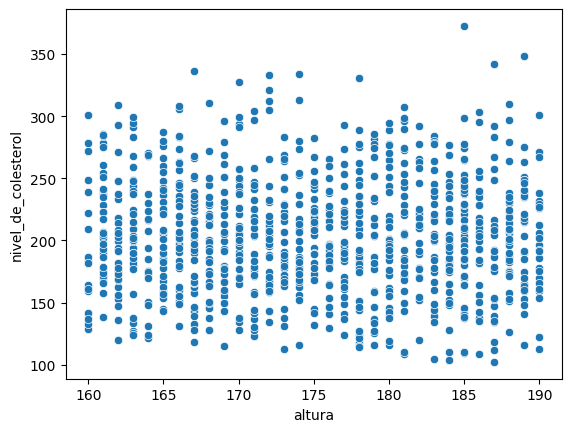

In [46]:
sns.scatterplot(data=df_colesterol_eda, x='altura', y='nivel_de_colesterol')

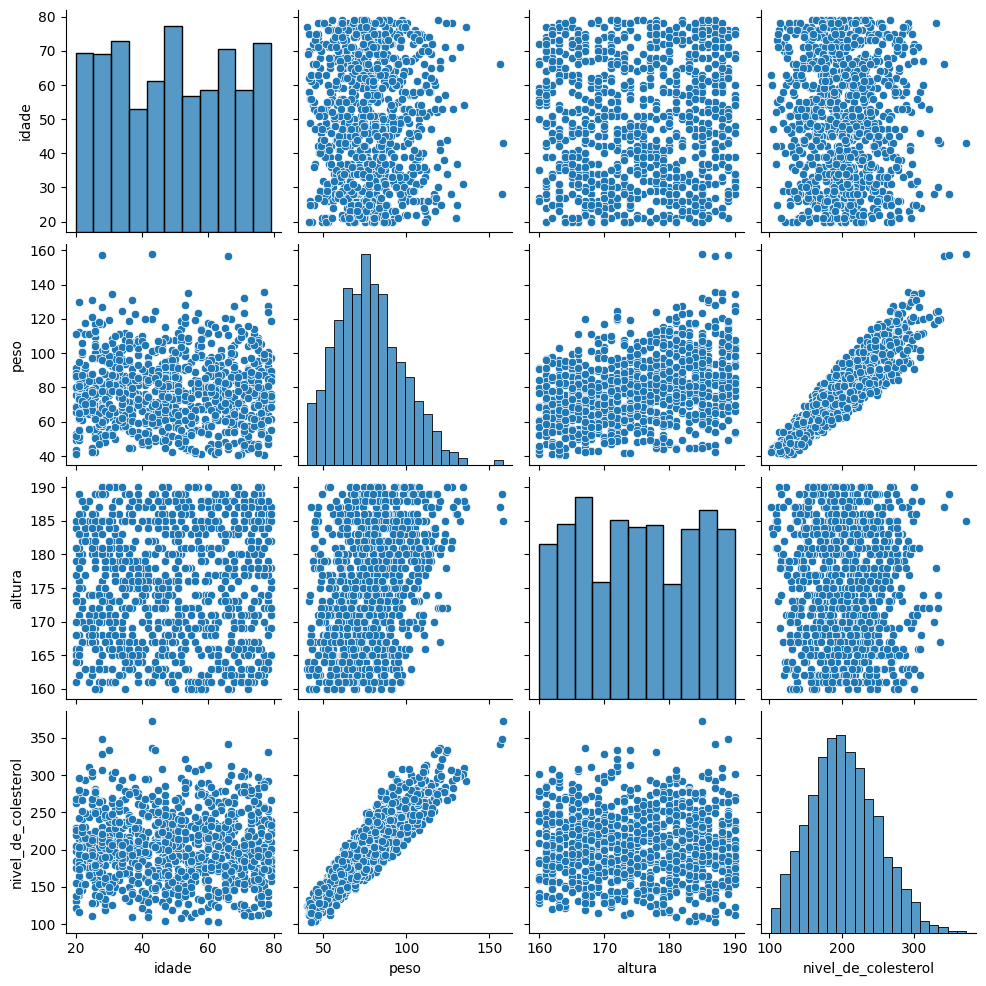

In [47]:
sns.pairplot(data=df_colesterol_eda)

In [48]:
# Converter variaveis categoricas nominais em numericas, usando One-hot encoder do Pandas
df_colesterol_eda = pd.get_dummies(df_colesterol_eda, columns=['grupo_sanguineo', 'fumante'], dtype='int64')

In [49]:
df_colesterol_eda.head(10)

,nivel_de_atividade,idade,peso,altura,nivel_de_colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,Baixo,33,85.1,186,199.63,0,0,1,0,0,1
1,Moderado,68,105.0,184,236.98,1,0,0,0,1,0
2,Alto,25,64.8,180,161.79,0,0,0,1,1,0
3,Alto,43,120.2,167,336.24,1,0,0,0,1,0
4,Baixo,79,88.5,175,226.23,0,1,0,0,1,0
5,Baixo,68,66.8,170,185.31,0,0,1,0,1,0
6,Baixo,60,117.3,181,289.33,1,0,0,0,0,1
7,Moderado,35,86.9,174,216.48,0,0,0,1,0,1
8,Baixo,62,81.3,166,235.30,0,0,0,1,1,0
10,Baixo,57,123.6,183,283.87,1,0,0,0,0,1


In [50]:
# Converter variavel categorica ordinal em numerica, usando o factorize do pandas
df_colesterol_eda.nivel_de_atividade = pd.factorize(df_colesterol_eda.nivel_de_atividade)[0] + 1

In [51]:
df_colesterol_eda.head(10)

,nivel_de_atividade,idade,peso,altura,nivel_de_colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,1,33,85.1,186,199.63,0,0,1,0,0,1
1,2,68,105.0,184,236.98,1,0,0,0,1,0
2,3,25,64.8,180,161.79,0,0,0,1,1,0
3,3,43,120.2,167,336.24,1,0,0,0,1,0
4,1,79,88.5,175,226.23,0,1,0,0,1,0
5,1,68,66.8,170,185.31,0,0,1,0,1,0
6,1,60,117.3,181,289.33,1,0,0,0,0,1
7,2,35,86.9,174,216.48,0,0,0,1,0,1
8,1,62,81.3,166,235.30,0,0,0,1,1,0
10,1,57,123.6,183,283.87,1,0,0,0,0,1


<Axes: >

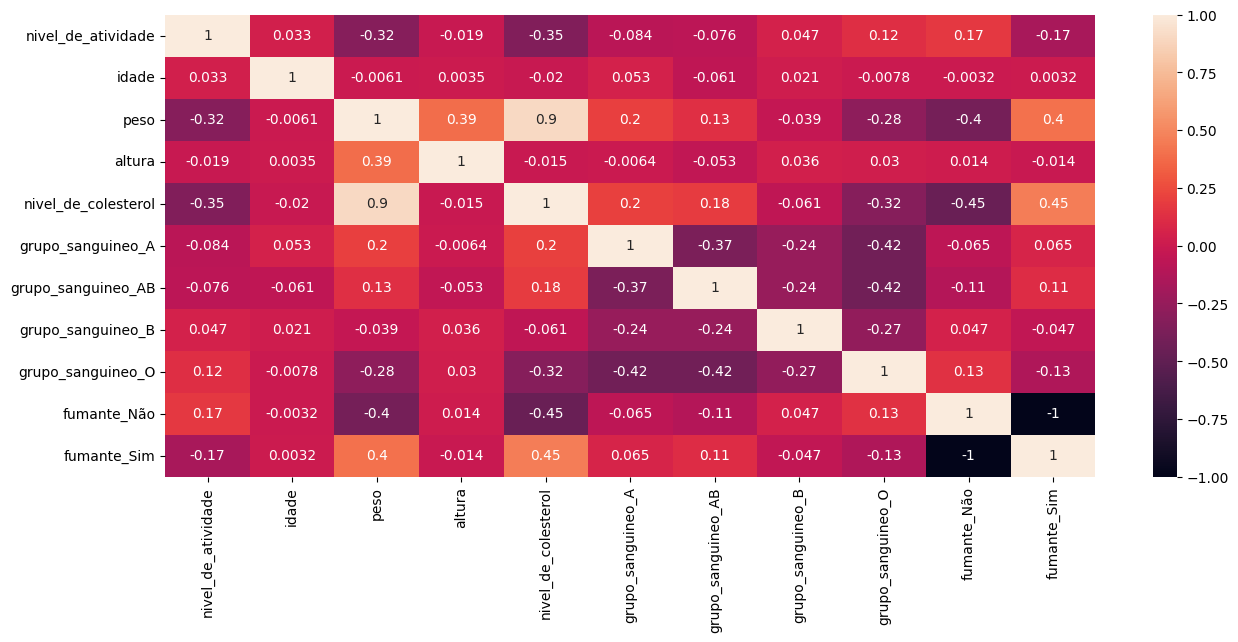

In [52]:
# Mapa de calor com correlacao entre as variaveis
plt.figure(figsize=(15,6))
sns.heatmap(df_colesterol_eda.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

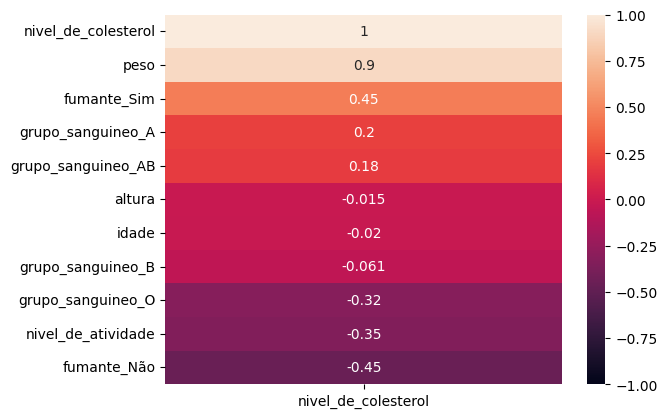

In [54]:
# Formato de ranking, somente correlacao com a variavel target
sns.heatmap(df_colesterol_eda.corr()[['nivel_de_colesterol']].sort_values(by='nivel_de_colesterol', ascending=False), vmin= -1, vmax=1, annot=True)

In [57]:
# Bucketing 
# realizar agrupamento de dados para realizar correlações com a variavel target

# Bucketing de idade
bins_idade = [20,30,40,50,60,70,80]
labels_idade = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df_colesterol_bucketing['escala_idade'] = pd.cut(x=df_colesterol_bucketing.idade, bins = bins_idade, labels = labels_idade, include_lowest=True)

In [58]:
df_colesterol_bucketing.head(10)

,grupo_sanguineo,fumante,nivel_de_atividade,idade,peso,altura,nivel_de_colesterol,escala_idade
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49


<Axes: xlabel='escala_idade', ylabel='nivel_de_colesterol'>

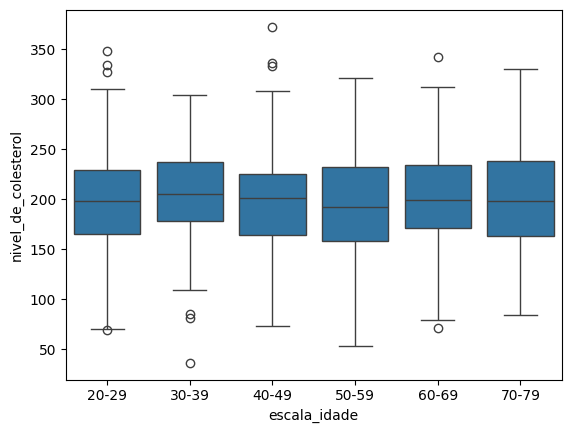

In [60]:
sns.boxplot(data=df_colesterol_bucketing, x='escala_idade' ,y='nivel_de_colesterol')

In [61]:
# Bucketing de peso
bins_peso = [40,50,60,70,80,90,100,110,120,130,140,150,160]
labels_peso = [ '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129', '130-139', '140-149', '150-159']
df_colesterol_bucketing['escala_peso'] = pd.cut(x=df_colesterol_bucketing.peso, bins = bins_peso, labels = labels_peso, include_lowest=True)

In [62]:
df_colesterol_bucketing.head(10)

,grupo_sanguineo,fumante,nivel_de_atividade,idade,peso,altura,nivel_de_colesterol,escala_idade,escala_peso
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39,80-89
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69,100-109
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29,60-69
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49,120-129
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79,80-89
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69,60-69
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59,110-119
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39,80-89
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69,80-89
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49,NaN


<Axes: xlabel='escala_peso', ylabel='nivel_de_colesterol'>

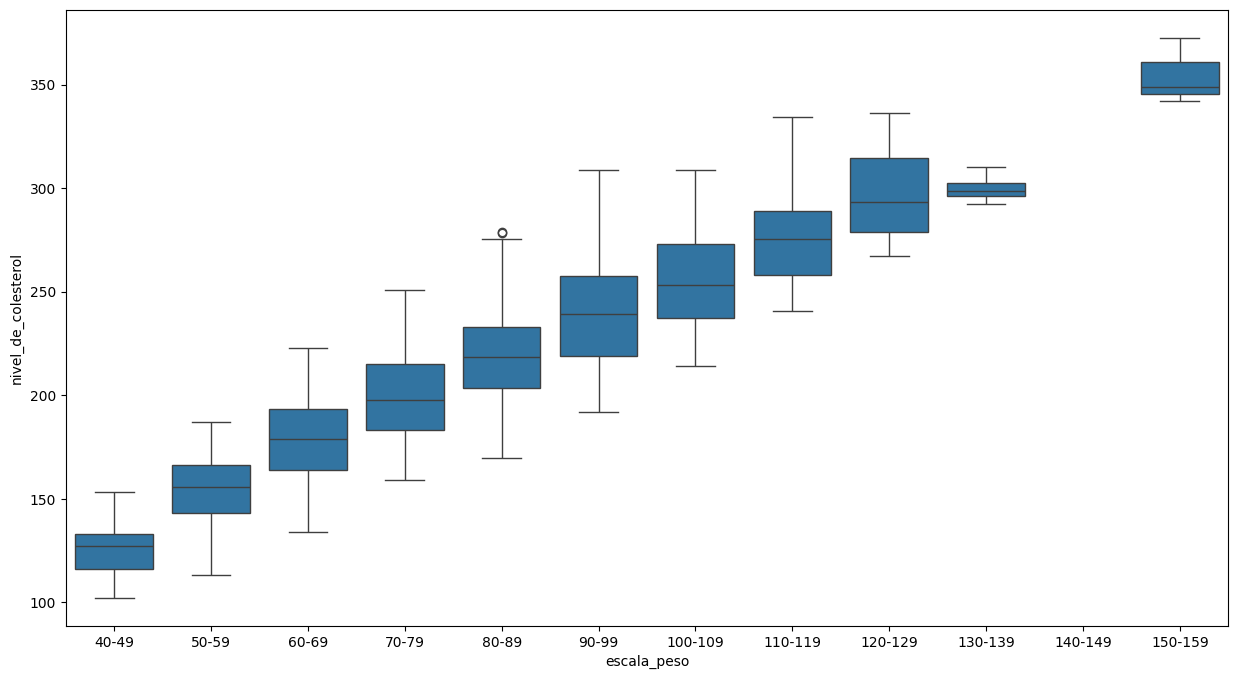

In [64]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_colesterol_bucketing, x='escala_peso' ,y='nivel_de_colesterol')

# Treinar modelo

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [66]:
# Criar dataset de treino e de teste
df_colesterol.drop(df_colesterol[df_colesterol.peso < 40].index, axis=0, inplace=True)

In [67]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   grupo_sanguineo      960 non-null    object 
 1   fumante              960 non-null    object 
 2   nivel_de_atividade   959 non-null    object 
 3   idade                960 non-null    float64
 4   peso                 960 non-null    float64
 5   altura               960 non-null    float64
 6   nivel_de_colesterol  963 non-null    float64
dtypes: float64(4), object(3)
memory usage: 60.2+ KB


In [68]:
x = df_colesterol.drop(columns='nivel_de_colesterol')
y = df_colesterol.nivel_de_colesterol

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=51)

In [74]:
# Pipeline 
# imputar moda nas variaveis categoricas
# padronizar variaveis numericas
# OneHotEncode nas variaveis categoricas nominais
# OneOrdinalEncode nas variaveis categoricas ordinais 
# Imputar mediana nas variaveis numericas

# Nomes da colunas
colunas_categoricas = ['grupo_sanguineo', 'fumante']
colunas_numericas = ['idade', 'altura', 'peso']
coluans_ordinais = ['nivel_de_atividade']

In [75]:
# Transformer Categorias
transformer_categorias = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

In [76]:
# Transformer Ordinais
transformer_ordinais = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[['Baixo', 'Moderado', 'Alto']], handle_unknown='error')),
])

In [77]:
# Transformer Numericas
transformer_numericas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

In [78]:
# Criar um column Transformer que encapsula todos os tranformes
preprocessor = ColumnTransformer(
    transformers= [
        ('num', transformer_numericas, colunas_numericas),
        ('cat', transformer_categorias, colunas_categoricas),
        ('ord', transformer_ordinais, coluans_ordinais)
    ]
)

In [79]:
# Criando Pipeline Principal = Preprocessor + treinamento
model_regr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [80]:
# Treinar modelo
model_regr.fit(x_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Análise de métricas

In [81]:
# Calcular a predicao
y_pred = model_regr.predict(x_test)

In [82]:
# Calcular R2 score
r2_score(y_test, y_pred)

0.9594250724093464

In [83]:
# Calcular MEA
mean_absolute_error(y_test, y_pred)

7.313838031022503

In [87]:
# Calcular RMSE
# mean_squared_error(y_test, y_pred, squared=False)

import numpy as np
np.sqrt(mean_squared_error(y_test, y_pred))


np.float64(9.097649246487032)

# Análise de Resíduos

In [88]:
# Calcular os residuos
residuos = y_test- y_pred

In [89]:
# Tranformar residuos na escala padrao
from scipy.stats import zscore
residuos_std =zscore(residuos)

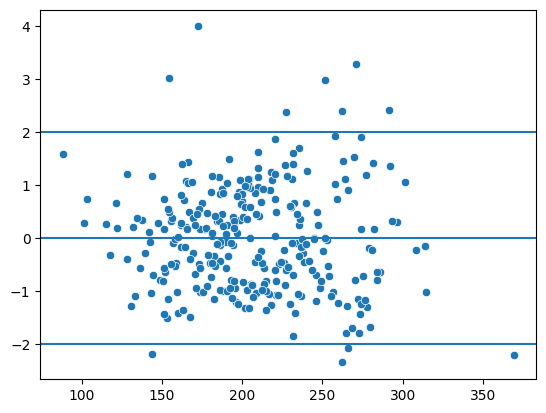

In [91]:
# Verificar linearidade dos residuos, valores entre -2 e 2
# Verificar homocedasticidade, valores proximos a reta

sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=2)
plt.axhline(y=-2)

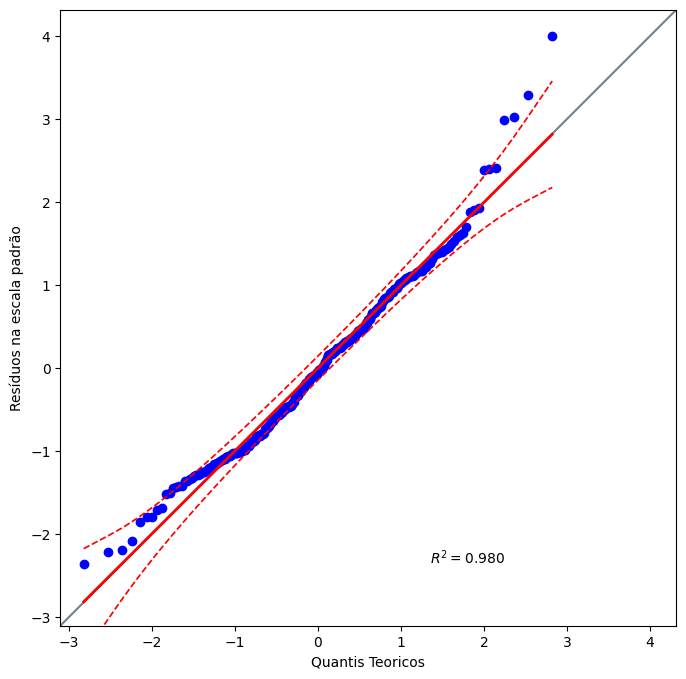

In [96]:
# Checar se residuos seguem uma distribuição normal
# QQplot
import pingouin as pg
plt.figure(figsize=(12,8))
pg.qqplot(residuos_std, dist='norm', confidence = 0.95)
plt.xlabel('Quantis Teoricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [98]:
# Teste de normalidade de Shapiro-Wilk
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt

stat_shapiro, pvalue_shapiro = shapiro(residuos)
print("Estatistica do Teste:{} e pvalue {}".format(stat_shapiro, pvalue_shapiro))

Estatistica do Teste:0.9807737729720729 e pvalue 0.0006268860444489818


In [100]:
# Teste de Kolmogorov-Smirnov
stat_Kolgomorov, pvalue_kolgomorov = kstest(residuos, 'norm')
print("Estatistica do Teste:{} e pvalue {}".format(stat_Kolgomorov, pvalue_kolgomorov))

Estatistica do Teste:0.42455920998485785 e pvalue 8.92583319090192e-48


In [101]:
# Teste de Lilliefors
stat_ll, pvalue_ll = lilliefors(residuos, dist = 'norm', pvalmethod='table')
print("Estatistica do Teste:{} e pvalue {}".format(stat_ll, pvalue_ll))

Estatistica do Teste:0.049553710301929066 e pvalue 0.12533323720735978


In [102]:
# Teste de Anderson-Darling
stat_and, critical_and, significance_and = anderson(residuos, dist = 'norm', )

In [103]:
critical_and

array([0.568, 0.647, 0.776, 0.906, 1.077])

In [104]:
significance_and

array([15. , 10. ,  5. ,  2.5,  1. ])

In [105]:
print("Estatistica do Teste:{} e Valor critico: {}".format(stat_and, critical_and[2]))

Estatistica do Teste:0.9169275158490109 e Valor critico: 0.776


In [107]:
# Testes de homocedasticidade de Goldfeld-Quandt
pipe = Pipeline(steps=[('preprocessor', preprocessor)])
x_test_transformed = pipe.fit_transform(x_test)

In [108]:
x_test_transformed

array([[-1.44340738, -0.58669129,  0.22608781, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.28157488, -1.05685776, -1.20886474, ...,  1.        ,
         0.        ,  0.        ],
       [-1.10973608, -0.35160806, -0.84754575, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 0.00250157, -1.52702423, -1.09014564, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.28056099, -0.35160806,  0.17447081, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.72545605, -1.17439938, -1.65277092, ...,  0.        ,
         1.        ,  0.        ]], shape=(289, 10))

In [111]:
test_goldfeld = het_goldfeldquandt(residuos, x_test_transformed)
stat_goldfeld = test_goldfeld[0]
pvalue_goldfeld = test_goldfeld[1]
print("Estatistica do Teste:{} e pvalue {}".format(stat_goldfeld ,pvalue_goldfeld))

Estatistica do Teste:0.6716135765253543 e pvalue 0.9893959472385484


# Realizar predições individuais

In [112]:
predicao_individual = {
    'grupo_sanguineo': 'O',
    'fumante': 'Não',
    'nivel_de_atividade': 'Alto',
    'idade': 40,
    'peso': 70,
    'altura': 180
}

sample_df = pd.DataFrame(predicao_individual, index=[1])

In [113]:
sample_df

,grupo_sanguineo,fumante,nivel_de_atividade,idade,peso,altura
1,O,Não,Alto,40,70,180


In [114]:
# Predicao 
model_regr.predict(sample_df)

array([165.32375099])

In [115]:
import joblib

In [116]:
# Salvar modelo
joblib.dump(model_regr, '.\mmodelo_colesterol.pkl')

['.\\mmodelo_colesterol.pkl']